In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
dev1 = qml.device('default.qubit', wires=1)
dev2 = qml.device('default.qubit', wires=2)

In [3]:
qml.drawer.use_style('sketch')

## Basic state

For 1 qubit,
$$
\begin{gathered}
\left| 0 \right> = (1 0) \\
\left| 1 \right> = (0 1)
\end{gathered}
$$

In [12]:
@qml.qnode(dev1)
def zero():
    return qml.probs(wires=0)

@qml.qnode(dev1)
def one():
    qml.PauliX(wires=0)
    return qml.probs(wires=0)

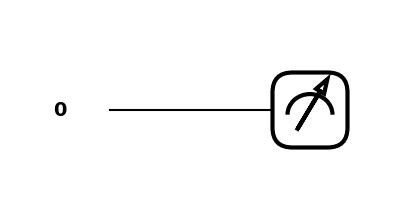

In [13]:
fig, ax = qml.draw_mpl(zero)()
plt.show()

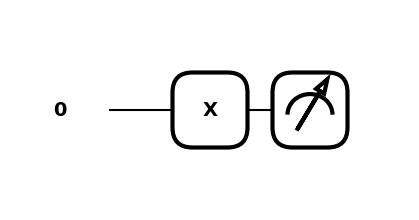

In [14]:
fig, ax = qml.draw_mpl(one)()
plt.show()

In [15]:
zero()

tensor([1., 0.], requires_grad=True)

In [16]:
one()

tensor([0., 1.], requires_grad=True)

For 2 qubit,

$$
\begin{gathered}
\left| 00 \right> = (1 0 0 0) \\
\left| 01 \right> = (0 1 0 0) \\
\left| 10 \right> = (0 0 1 0) \\
\left| 11 \right> = (0 0 0 1)
\end{gathered}
$$

In [17]:
@qml.qnode(dev2)
def zerozero():
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def zeroone():
    qml.PauliX(wires=1)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def onezero():
    qml.PauliX(wires=0)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def oneone():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    return qml.probs(wires=[0,1])

In [18]:
zerozero()

tensor([1., 0., 0., 0.], requires_grad=True)

In [19]:
zeroone()

tensor([0., 1., 0., 0.], requires_grad=True)

In [20]:
onezero()

tensor([0., 0., 1., 0.], requires_grad=True)

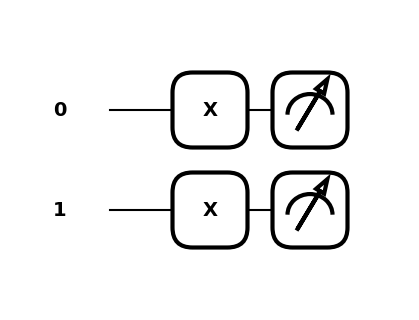

In [22]:
fig, ax = qml.draw_mpl(oneone)()
plt.show()

In [21]:
oneone()

tensor([0., 0., 0., 1.], requires_grad=True)

## Hadamard Gate

$$
H\left|x\right> = \frac{1}{\sqrt{2}}\left(\left|0\right> + (-1)^x \left|1\right>\right)
$$

In [37]:
@qml.qnode(dev1)
def hadamard_gate(x):
    qml.BasisStatePreparation(x, wires=[0])
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

In [40]:
x_zero = [0]
x_one  = [1]

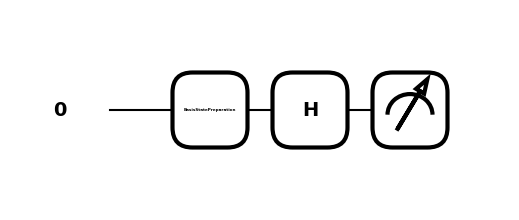

In [41]:
fig, ax = qml.draw_mpl(hadamard_gate)(x_zero)
plt.show()

In [42]:
hadamard_gate(x_zero)

tensor([0.5, 0.5], requires_grad=True)

In [43]:
hadamard_gate(x_one)

tensor([0.5, 0.5], requires_grad=True)

In [49]:
@qml.qnode(dev1)
def hadamard_gate_comp(x):
    x = x / np.linalg.norm(x)
    qml.QubitStateVector(x, wires=[0])
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

In [58]:
x_zero = [1, 0]
x_one  = [0, 1]
x_mix1 = [1, 1]
x_mix2 = [1,-1]

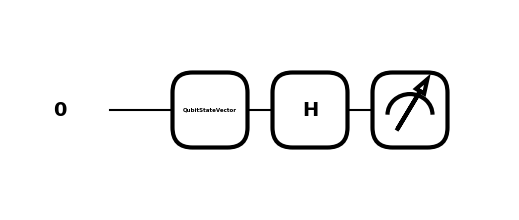

In [51]:
fig, ax = qml.draw_mpl(hadamard_gate_comp)(x_mix)
plt.show()

In [52]:
hadamard_gate_comp(x_zero)

tensor([0.5, 0.5], requires_grad=True)

In [53]:
hadamard_gate_comp(x_one)

tensor([0.5, 0.5], requires_grad=True)

In [59]:
hadamard_gate_comp(x_mix1)

tensor([1., 0.], requires_grad=True)

In [60]:
hadamard_gate_comp(x_mix2)

tensor([0., 1.], requires_grad=True)

### Same probability does not mean same state

In [55]:
@qml.qnode(dev1)
def hadamard_comp_state(x):
    x = x / np.linalg.norm(x)
    qml.QubitStateVector(x, wires=[0])
    qml.Hadamard(wires=0)
    return qml.state()

In [56]:
hadamard_comp_state(x_zero)

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

In [57]:
hadamard_comp_state(x_one)

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

## CNOT Gate

In [8]:
@qml.qnode(dev2)
def cnot_gate():
    qml.CNOT(wires=[0,1])
    return qml.state()

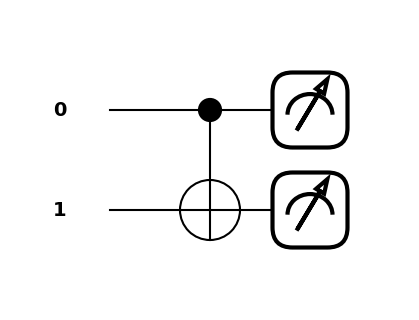

In [9]:
fig, ax = qml.draw_mpl(cnot_gate)()
plt.show()

In [10]:
cnot_gate()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)